<div style="height:100px">

<div style="display:inline-block; width:77%; vertical-align:middle;">
    <div>
        <b>Author</b>: <a href="http://pages.di.unipi.it/castellana/">Daniele Castellana</a>
    </div>
    <div>
        PhD student at the Univeristy of Pisa and member of the Computational Intelligence & Machine Learning Group (<a href="http://www.di.unipi.it/groups/ciml/">CIML</a>)
    </div>
    <div>
        <b>Mail</b>: <a href="mailto:daniele.castellana@di.unipi.it">daniele.castellana@di.unipi.it</a>
    </div>
</div>

<div style="display:inline-block; width: 10%; vertical-align:middle;">
    <img align="right" width="100%" src="https://upload.wikimedia.org/wikipedia/it/7/72/Stemma_unipi.png">
</div>

<div style="display:inline-block; width: 10%; vertical-align:middle;">
    <img align="right" width="100%" src="http://www.di.unipi.it/groups/ciml/Home_files/loghi/logo_ciml-restyling2018.svg">
</div>
</div>

# NN for Sequential Data

In this example we introduce the LSTM, a common neural model used to learn from sequential data.

We will use the LSTM model to predict the next steps of a syntetic time-series.

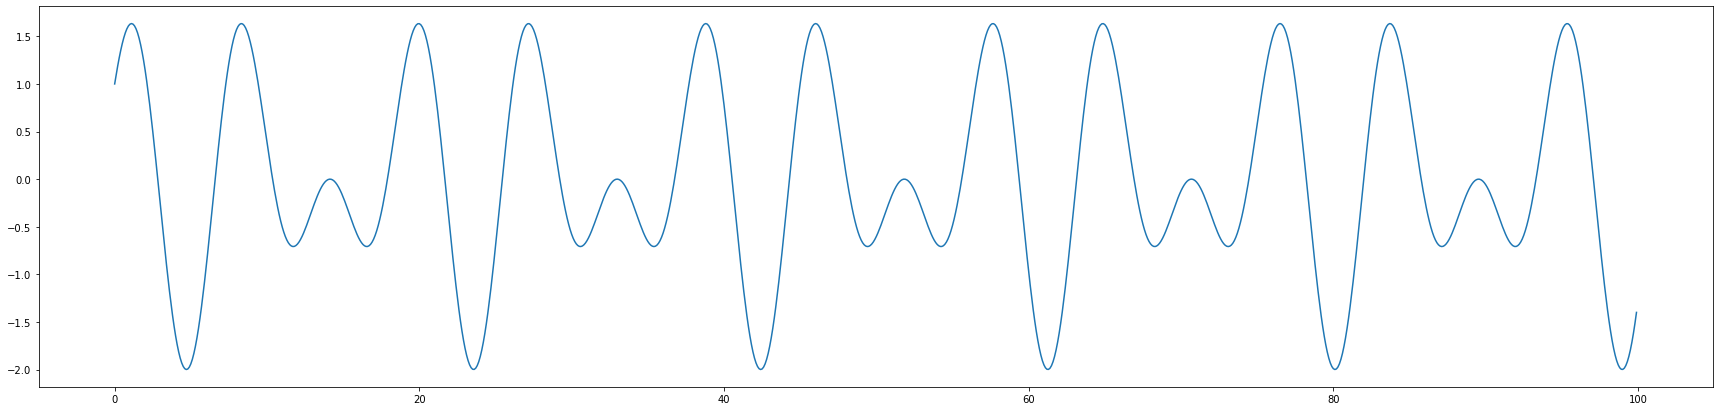

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x):
    return np.sin(x)+np.cos(2/3*x)

x=np.arange(0, 5000, 0.1)
plt.figure(figsize=(30, 7))
plt.plot(x[:1000], f(x[:1000]))
data = f(x)

## Define the model

In Keras, the LSTM is a layer and therefore we can use it as we used the Dense layer.

The main difference is that the input of an LSTM is a 3-D tensor. In fact, we need to add a dimension in order to represent the time. Hence, the data must have the shape $N \times L \times D$, where:
- $N$ is the number of sequence
- $L$ is the number of time-steps in each sequence
- $D$ is the number of feature for each time-step

In this case, we decide to cast the problem as **many2one**: we feed the LSTM with a sequence and it will return us the next value. 

Also, we try $L=1$.

In [2]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

seq_len = 1
def build_LSTM_many2one():
    
    model = Sequential()
    model.add(LSTM(30, input_shape=(seq_len,1)))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

Using TensorFlow backend.


Therefore, we need to specify an input sequence for each time-steps we would like to predict.

In [3]:
#prepare data
def prepare_LSTM_many2one_data():
    x_train = np.array([data[i:i+seq_len] for i in range(len(data)-seq_len)]).reshape(-1, seq_len, 1)
    y_train = np.array([data[seq_len+i] for i in range(len(data)-seq_len)])
    
    return x_train, y_train

In [4]:
x_train, y_train = prepare_LSTM_many2one_data()
print('The input shape is {}\n'
      'The output shape is {}'.format(x_train.shape, y_train.shape))

The input shape is (49999, 1, 1)
The output shape is (49999,)


Even if we have only one sequence, for the model there are 49999 of them!

## Fit the model

In [5]:
many2one = build_LSTM_many2one()

many2one.fit(x_train, y_train, epochs=10, batch_size=100);

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
49999/49999 [==============================] - 2s 32us/step - loss: 0.2454
Epoch 2/10
49999/49999 [==============================] - 1s 16us/step - loss: 0.0082
Epoch 3/10
49999/49999 [==============================] - 1s 16us/step - loss: 0.0080
Epoch 4/10
49999/49999 [==============================] - 1s 16us/step - loss: 0.0078
Epoch 5/10
49999/49999 [==============================] - 1s 17us/step - loss: 0.0076
Epoch 6/10
49999/49999 [==============================] - 1s 17us/step - loss: 0.0074
Epoch 7/10
49999/49999 [==============================] - 1s 17us/step - loss: 0.0073
Epoch 8/10
49999/49999 [==============================] - 1s 18us/step - loss: 0.0073
Epoch 9/10
49999/49999 [==============================] - 1s 18us/step - loss: 0.0073
Epoch 10/10
49999/49999 [==============================] - 1s 18us/step - loss: 0.0072


## Next-step prediction

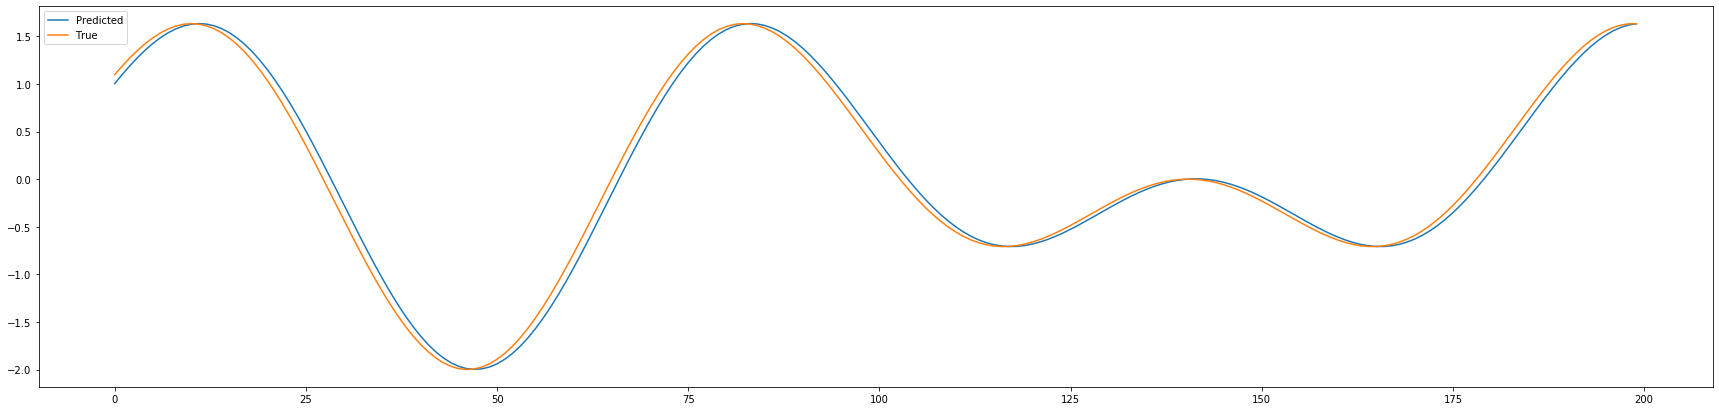

In [6]:
pred = many2one.predict(x_train[:1000,:,:])
plt.figure(figsize=(30, 7))
plt.plot(pred[:200], label='Predicted')
plt.plot(y_train[:200], label='True')
plt.legend();

$L=1$ was not enough to predict the next one! (There are same input values with different output)

The seq lenght should be long enough to contain the temporal relation than the model can capture it. In this case,  $L=2$ is enough.

Hence, we retrain the model fixing $L=2$.

In [8]:
seq_len=2
x_train2, y_train2 = prepare_LSTM_many2one_data()
print('The input shape is {}\n'
      'The output shape is {}'.format(x_train2.shape, y_train2.shape))

The input shape is (49998, 2, 1)
The output shape is (49998,)


In [20]:
many2one2 = build_LSTM_many2one()
many2one2.fit(x_train2, y_train2, epochs=10, batch_size=100);

Epoch 1/10
49998/49998 [==============================] - 2s 44us/step - loss: 0.1567
Epoch 2/10
49998/49998 [==============================] - 1s 25us/step - loss: 0.0190
Epoch 3/10
49998/49998 [==============================] - 1s 24us/step - loss: 0.0159
Epoch 4/10
49998/49998 [==============================] - 1s 24us/step - loss: 0.0097
Epoch 5/10
49998/49998 [==============================] - 1s 24us/step - loss: 0.0016
Epoch 6/10
49998/49998 [==============================] - 1s 26us/step - loss: 1.0601e-04
Epoch 7/10
49998/49998 [==============================] - 1s 25us/step - loss: 2.4760e-05
Epoch 8/10
49998/49998 [==============================] - 1s 26us/step - loss: 1.3587e-05
Epoch 9/10
49998/49998 [==============================] - 1s 27us/step - loss: 1.1435e-05
Epoch 10/10
49998/49998 [==============================] - 1s 27us/step - loss: 1.0586e-05


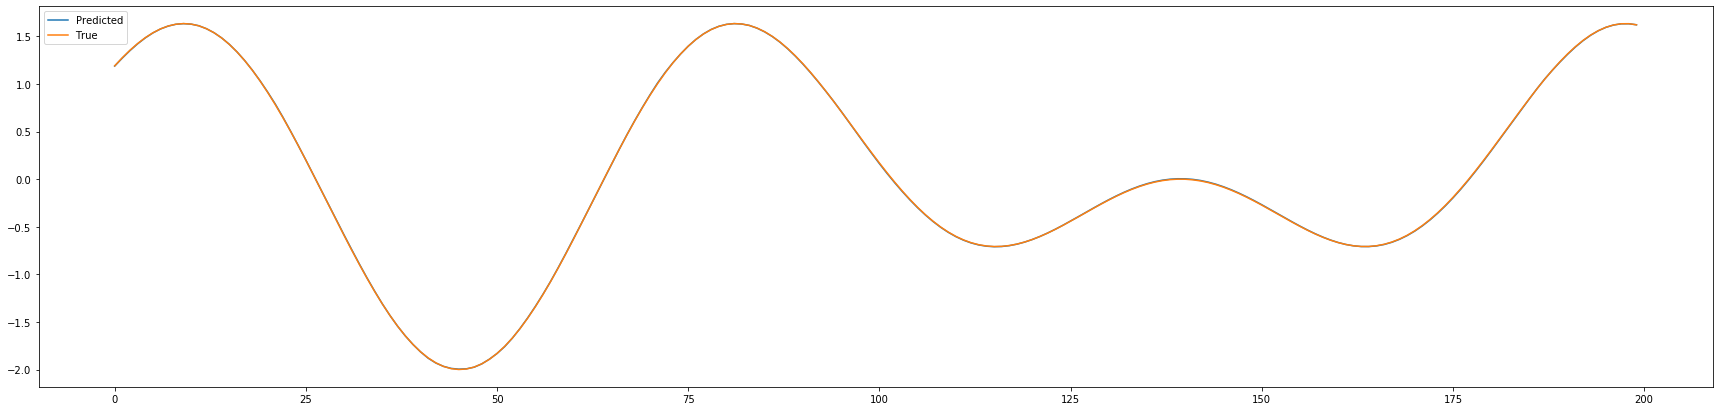

In [21]:
pred2 = many2one2.predict(x_train2[:1000,:,:])
plt.figure(figsize=(30, 7))
plt.plot(pred2[:200], label='Predicted')
plt.plot(y_train2[:200], label='True')
plt.legend();

**The model is able to predict the series**

## Multi-step ahead prediction

In the previous case, we use the model to predict the next value in the sequence **but we don't feed it again as input to predict the next value**; instead, we use the true value.

What happen if we use predicted values to predict values?

In [24]:
#multi-step prediction
in_seq = np.zeros((1,seq_len,1))
for t in range(seq_len):
    in_seq[0,t,0] = x_train2[0,t,0]
    
n_prediction = 1000
pred_multi_step = np.zeros((n_prediction,1))
for i in range(n_prediction):
    #print(in_seq)
    pred_el = many2one2.predict(in_seq).squeeze()
    pred_multi_step[i] = pred_el
    for t in range(seq_len-1):
        in_seq[0,t,0] = in_seq[0,t+1,0]
    in_seq[0,-1,0] = pred_el

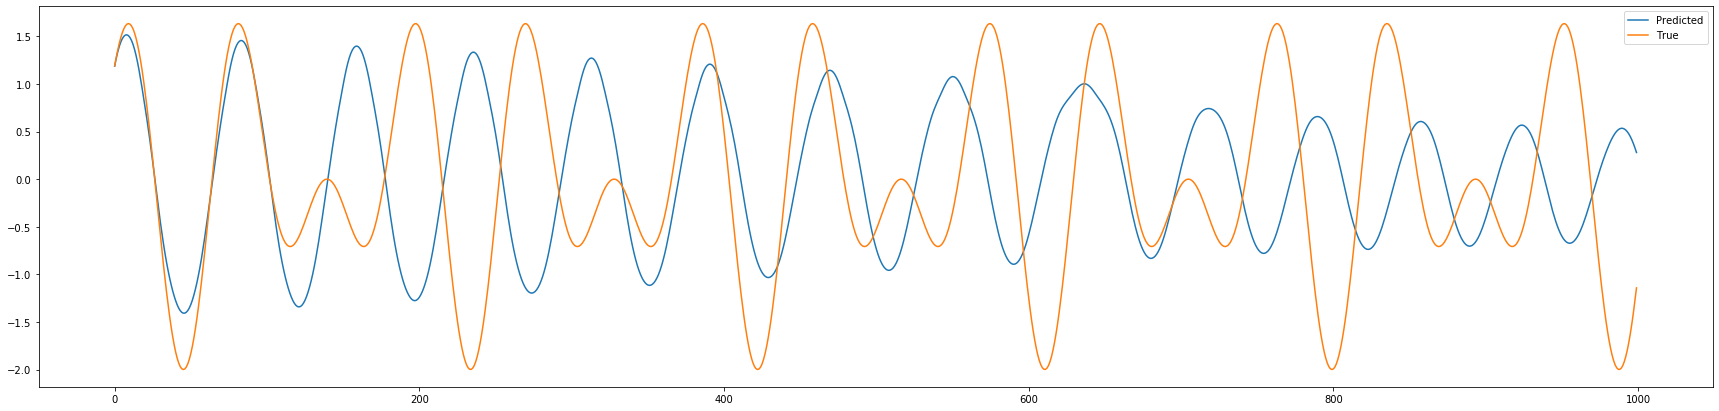

In [27]:
plt.figure(figsize=(30, 7))
plt.plot(pred_multi_step, label='Predicted')
plt.plot(y_train2[:n_prediction], label='True')
plt.legend();

**The prediction is no more accurate**

Even if the error on a single step is small, we are propagate it! Hence, after multiple prediction, the error becomes too large for a correct prediction.